# 딥러닝을 활용한 음성 합성 시스템(TTS) 구현하기

### 1. 프로젝트 목표 및 내용

이 프로젝트는 파이썬을 사용하여 한국어 문장을 사람의 목소리로 발음할 수 있는 음성 합성 시스템을 구현하는 것을 목표로 한다. 또한 한 사람의 목소리가 아닌 여러 사람의 목소리로 발화할 수 있도록 한다. 부가적인 목표로 한국어 문장 뿐만 아니라 영어 문장도 발음할 수 있도록 연구해본다.  
이를 구현하기 위해 딥러닝 기술을 사용한다. 딥러닝을 사용하는 부분은 머신러닝 라이브러리인 텐서플로우(TensorFlow)를 사용하여 구현한다. 특히 텐서플로우 2.0 버전을 사용하여 직접 구현해보는 것을 목표로 한다.
이 프로젝트의 최종 단계에서는 사용자가 임의의 문장을 입력하면 이를 발음한 음성 파일을 출력할 수 있을 것이다.

### 2. 주제 선정 이유
음성 합성 시스템(TTS)은 다양한 분야에서 활용되고 있다. 공공 장소에서의 안내 방송, 애플의 Siri나 삼성의 빅스비 등의 개인 비서 서비스, 또는 내비게이션에서 우리는 쉽게 TTS를 접할 수 있다. 그런데 개인적으로 TTS가 필요해서 인터넷에 검색해본다면, 개인이 자유롭게 사용하기에 적합한 TTS는 찾아보기 힘들다는 것을 알 수 있다. 몇몇 오래된 소프트웨어들이 발견되곤 하는데, 자유롭게 사용 가능하지만 발음이 굉장히 부자연스러워 사용하기에 거부감이 든다. 기업에서 자연스러운 음성의 TTS서비스를 제공하기도 하지만, 이러한 서비스는 기업을 대상으로 하기 때문에 유료로 제공된다. 따라서 개인이 사용하기엔 부적합하다. 그래서 이번 프로젝트를 통해 개인이 사용하기에 적합한 TTS를 파이썬과 텐서플로우를 사용하여 만들어 보기로 했다.

### 3. 데이터 획득
인터넷에서 다음과 같은 음성 데이터셋을 사용하여 학습을 진행하였다.
아래의 데이터들은 모두 비상업적 연구 목적으로 이용될 수 있는 데이터들이다.

#### 한국어 음성 데이터셋
1. 서울말 낭독체 발화 말뭉치 (약 120시간)  
https://ithub.korean.go.kr/user/corpus/referenceManager.do  
국립국어원에서 제공하는 데이터셋이다. 발화자가 다양하다.
2. Zeroth-Korean (약 51 시간)  
GitHub 링크: https://github.com/goodatlas/zeroth  
데이터셋 링크: http://www.openslr.org/40/  
한국어 음성인식 오픈소스 프로젝트에서 공개된 데이터셋이다. 발화자가 다양하다.  
Morecoin 모바일앱을 통해 음성을 기부하면 95시간 가량의 데이터를 열람할 수 있다고 한다.
3. Korean Single Speaker Speech Dataset (약 12시간)  
https://www.kaggle.com/bryanpark/korean-single-speaker-speech-dataset  
여자 성우 한 명으로 구성된 데이터셋이다.

#### 영어 음성 데이터셋
1. LibriSpeech (약 1000시간)  
http://www.openslr.org/12/  
LibriVox 프로젝트의 오디오북 읽기에서 만들어진 데이터셋으로 발화자가 다양하고 데이터셋이 크다.  
학습에는 전체 데이터셋 중 train-clean-100을 사용하였다. 이는 약 100시간 분량의 데이터이다.
2. LJ Speech (약 24시간)  
https://keithito.com/LJ-Speech-Dataset/  
여자 성우 한 명으로 구성된 데이터셋이다.

### 4. 구현 내용
#### 4.1 데이터 전처리
먼저 위에서 나열한 데이터셋을 모두 다운로드 한 뒤, 적당한 위치에 압축 해제한다.
총 5개의 데이터셋을 사용하는데 각 데이터셋의 구조가 다르므로 각기 조금씩 다른 방법으로 다뤄주어야 한다. 다음은 각 데이터셋을 처리한 방법이다.
1. 서울말 낭독체 발화 말뭉치 (이하 NIKL)  
NIKL은 조금 다루기가 까다로운 데이터셋이다. script_nmbd_by_sentence.txt에 사용된 모든 문장이 나열되어 있다. 그런데 가끔 잘못 넘버링된 라인이 있기 때문에 이를 직접 찾아 고쳐주었고, script_nmbd_by_sentence_fixed.txt라는 파일을 새로 만들어 사용하였다. 오디오 파일은 fv01_t01_s01.wav와 같은 이름 형식으로 작성되어있다. 화자이름_문단번호_문장번호.wav의 형식인데, 이에 해당하는 텍스트 라인을 script_nmbd_by_sentence_fixed.txt에서 찾아 매칭해주는 식으로 구현하였다. 가끔 데이터셋에 예외적으로 네이밍된 wav파일이 존재하는데(fv13_t11_s16-17.wav, fv18_t08_s02(재녹음).wav 등), 이러한 파일들은 무시하고 학습에 사용하지 않았다.
2. Zeroth-Korean (이하 Zeroth)  
Zeroth는 화자의 번호에 해당하는 폴더들이 존재하고, 각 폴더 안에는 그 화자에 해당하는 모든 flac파일과 각 flac파일이 어떤 문장을 발화한 것인지를 나타내주는 txt파일이 존재한다. 먼저 txt파일을 읽은 뒤에, 각 라인에 대해서 해당하는 flac파일을 찾아주고 이에 문장을 매칭해주는 식으로 구현하면 쉽게 처리할 수 있다.
3. Korean Single Speaker Speech Dataset (이하 KSS)  
KSS는 transcript.v.1.3.txt라는 파일이 존재한다. 이 파일은 데이터셋의 모든 wav파일과 그에 맞는 문장을 나타내주는 파일이고, 일반 문장뿐만 아니라 자모 단위로 나타낸 문장과 번역된 영어 문장도 포함하고 있다. 나중에 한글 문장을 자모단위로 쪼개서 처리하는데, 이미 이 데이터셋은 자모 단위의 문장을 제공하기 때문에 이를 사용하였다.
4. LibriSpeech (이하 Libri)  
Libri는 Zeroth와 구조가 유사하다. 각 화자에 해당하는 폴더 안에 txt파일이 존재하고, 이 파일은 각 flac 파일이 어떤 문장을 발화한 것인지를 나타내준다. 따라서 Zeroth와 유사한 방법으로 처리하였다. 이 데이터셋은 Zeroth와 마찬가지로 본래 음성 인식을 위해 구성된 데이터셋으로, 문장 끝에 마침표가 없다. 따로 마침표를 붙이지 않고 그대로 학습에 사용하였다. 이 데이터셋의 대부분의 파일은 오디오의 시작과 끝, 심지어 음성 중간중간에도 긴 시간의 공백이 포함되어 있다. 오디오에 존재하는 불필요한 공백은 학습에 큰 악영향을 미치므로(특히 Alignment에), 모두 잘라내어 처리하였다. 특정 발화자의 마이크의 상태가 좋지 않아 노이즈가 심하게 낀 음성 파일들이 가끔 존재하는데 이는 그대로 학습에 사용하였다.
5. LJ Speech (이하 LJ)  
KSS와 유사한 구조를 가지고 있으므로 비슷한 방법으로 처리할 수 있다. metadata.csv파일을 읽어 처리하면 된다.

이제 각 오디오 파일과 그에 대응하는 문장, 화자를 알 수 있게 되었다.
![](images/text_speaker_wav.png)

다음은 각 데이터를 학습에 적합하도록 처리한 방법을 설명한다.
1. 문장  
문장은 문자열로 존재한다. 이를 학습에 사용하기 위해 문장을 문자로 쪼개고 이를 토큰화하는 작업을 진행할 것이다. 먼저 각 문자에 번호를 부여하자. 예를 들면, 영어의 경우 {'a': 0, 'b': 1, 'c': 2, ..., 'z': 25} 라는 딕셔너리를 생각할 수 있고 문자열을 이 규칙에 따라 숫자로 치환하면 다음과 같을 것이다.

   ```hello => [7, 4, 11, 11, 14]```

    한글의 경우도 같은 방법을 생각할 수 있지만, 초성, 중성, 종성으로 한 글자를 조합하는 한글의 경우, 한 글자에 대한 가능한 경우의 수가 너무나도 많고, 딕셔너리도 크기가 매우 커질 것이다. 따라서 한글은 글자를 자모로 분리하여 처리하도록 한다. [여기](https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80_%EB%82%B1%EC%9E%90_%EB%AA%A9%EB%A1%9D)에서 자모가 유니코드 상에서 어떤 위치에 존재하는지 확인할 수 있다. 정리하면 다음과 같다.
   
   ```
   초성 (19개): 0x1110 ~ 0x1112
   중성 (21개): 0x1161 ~ 0x1175
   종성 (27개): 0x11A8 ~ 0x11C2
   ```

   파이썬 라이브러리인 [```jamo```](https://github.com/jdongian/python-jamo)를 사용하여 문자열을 초성 중성 종성들로 분해할 수 있다. 이제 각 초성, 중성, 종성, 알파벳, 문장부호들에 대해서 고유한 번호를 부여하고, 문자열을 이 규칙에 따라 숫자의 배열로 변환할 수 있다. 정리하면 다음과 같다.
   
   ```
   (문자열) "그는 괜찮은 척하려고 애쓰는 것 같았다."
   (분해) ['ᄀ', 'ᅳ', 'ᄂ', 'ᅳ', 'ᆫ', ' ', 'ᄀ', 'ᅫ', 'ᆫ', 'ᄎ', 'ᅡ', 'ᆭ', 'ᄋ', 'ᅳ', 'ᆫ', ' ', 'ᄎ', 'ᅥ', 'ᆨ', 'ᄒ', 'ᅡ', 'ᄅ', 'ᅧ', 'ᄀ', 'ᅩ', ' ', 'ᄋ', 'ᅢ', 'ᄊ', 'ᅳ', 'ᄂ', 'ᅳ', 'ᆫ', ' ', 'ᄀ', 'ᅥ', 'ᆺ', ' ', 'ᄀ', 'ᅡ', 'ᇀ', 'ᄋ', 'ᅡ', 'ᆻ', 'ᄃ', 'ᅡ', '.']
   (치환) [0, 37, 2, 37, 43, 103, 0, 29, 43, 14, 19, 45, 11, 37, 43, 103, 14, 23, 40, 18, 19, 5, 25, 0, 27, 103, 11, 20, 10, 37, 2, 37, 43, 103, 0, 23, 58, 103, 0, 19, 64, 11, 19, 59, 3, 19, 93]
   ```
   
   추가적으로 다음과 같은 특수한 역할을 하는 문자들을 추가하였다.
   
   ```
   PAD = '_'
   EOS = '>'
   ```
   
   PAD는 두개 이상의 문자열을 하나로 묶어 처리해야 할 때(Batching) 문자열의 길이가 모두 같아야 한다. 이때 문자열의 길이를 맞추어주기 위해 뒷부분에 아무 의미없이 삽입되는 문자가 PAD이다. EOS는 문자열이 끝났을 때 주어지는 문자이다. 따라서 16개의 문자열을 한꺼번에 처리하기 위해 처리된 모습은 다음과 같다. 가장 긴 문장에는 PAD가 삽입되지 않았다는 점에 주목하자. 따옴표는 문자열을 표기하기 위한 것이 아니라 실제로 문장에 존재하는 문장부호이다.
   
   ```
   계집이 다 무어야.>_________
   '고 녀석 말투가.'>________
   '그거 참 걱정이네'.>_____
   자라가 나섰습니다.>_______
   '나무꾼 아저씨!'>__________
   '살려 주세요.'>____________
   '어서 나오너라.'>___________
   '여보세요, 선녀님!'>______
   그런데 이게 웬 일이죠?>__
   '아이 배고프구나'.>_________
   '아무래도 안 되겠다'.>____
   '제가 한번 해볼까요?'>___
   '이걸로 한번 해봅시다!'>
   미간이 아찔했다.>________
   못들은 체했다.>_________
   이유는 간단하다.>________
   ```

2. 화자  
문자를 숫자로 치환한 것과 마찬가지로 각 화자에 고유한 번호를 부여하여 처리하는 방법을 사용한다. 각 데이터셋의 화자들에 대해 접두사는 다음과 같다.
   - nikl_*
   - zeroth_*
   - kss_*
   - libri_*
   - lj_*


3. 오디오 파일  
음성 처리는 librosa 라이브러리를 이용한다. 오디오 파일을 열면 파형 데이터를 얻을 수 있다. 파형은 1차원 배열로(모노라고 가정) 표현되며, 각 값은 시간 t에서의 소리의 세기를 나타낸다. 각 파일마다 sample rate가 모두 다른데, 모두 sample rate를 16000Hz로 변환하여 처리하였다. 이렇게 추출한 파형을 학습에 그대로 사용할 수도 있지만, 더 효과적인 학습을 위해 중요한 특징만을 추출하여 사용하기로 했다. 먼저 파형에 대해 short time fourier transform(stft)을 진행한다. stft는 푸리에 변환을 짧은 시간에 대해 반복해주는 것이다. stft의 결과는 복소수인데 abs를 통해 실수로 바꿔준다(복소수의 길이). 따라서 결과는 2차원 배열 즉 이미지의 형태이며, 시간축과 주파수축을 가진다. 배열 속 각각의 값은 특정 시간의 해당 주파수의 강도를 나타낸다.
![](images/linear.png)
   이렇게 얻은 결과를 power spectrogram으로 변환 후, mel spectrogram으로 바꾸어준다. mel scale은 주파수를 다음과 같은 공식에 따라 비선형적으로 바꿔준다. 이 과정을 통해 더욱 음성의 특징만을 추출할 수 있다.
$$m = 2595\log_{10}(1+\frac{f}{700})$$
![](images/mel.png)
   각 spectrogram에 log를 취해서 log scale spectrogram과 log scale mel spectrogram을 얻는다.
![](images/linear_log.png)
![](images/mel_log.png)
   마지막으로 값의 하한과 상한을 정하여 [0, 1]의 범위로 만들어주었다.
   이렇게 얻은 두 spectrogram은 모두 학습에 사용되었다.
   
   
지금까지의 과정을 통해 각 데이터에 대해 (문장, 화자, log scale linear spectrogram, log scale mel spectrogram)을 얻었다. 이렇게 처리하면 데이터셋의 용량이 굉장히 커진다(약 90GB). 따라서 효과적인 데이터 파이프라인을 구축해야 하는데, 텐서플로우의 tfrecord를 활용하여 최종적으로 데이터를 디스크에 저장하였다. 이후의 학습 과정에서 데이터들은 배치 단위로 학습이 되는데, 효율적인 학습 진행을 위해 미리 데이터들을 배치 단위로 묶어서 저장해놓기로 하였다. 배치 크기는 32를 사용하였다. 최종적인 데이터 처리 과정은 다음과 같다.
1. 모든 데이터 쌍(문장, 화자, ...)들을 spectrogram의 시간 길이에 대해서 정렬한다. 이렇게 하는 이유는, 한 배치 안에서 데이터들의 spectrogram의 시간 길이가 크게 차이가 나는 경우 spectrogram에 불필요한 padding처리를 해야하는데, padding은 아무 의미가 없지만 불필요한 연산량을 차지하게 된다. 후에 서술하지만 모델의 Encoder보다 Decoder의 연산이 더욱 복잡하다고 판단되어 spectrogram에 padding을 삽입하는 것보다 문장에 padding을 삽입하는 것이 더 낫다고 판단되었다. 따라서 spectrogram에 불필요한 padding을 최소화 하기 위해서 spectrogram을 길이 순 정렬한다.
2. 정렬된 데이터들을 순서대로 32개씩 끊어 한 배치를 만든다. 한 배치의 데이터의 길이들은 모두 동일해야 하므로, 배치 안에서 가장 긴 문장 길이에 맞도록 문장 뒤에 PAD를 삽입하고, 가장 긴 spectrogram 길이에 맞도록 spectrogram를 padding처리한다(zero padding).
3. 2의 과정에서 추가적인 데이터로 stop token을 생성한다. stop token은 후에 서술할 Decoder가 언제 spectrogram 생성을 종료해야 하는지를 알려주기 위한 용도이다. 즉 시간 t에서 stop token == 0 인경우, t+1 spectrogram을 계속 생성하고, stop token == 1인 경우 여기서 종료한다. stop token은 기본적으로 0이고, spectrogram이 끝나는 시간 t이후로는 값이 1로 설정되도록 한다. 이때 padding 된 후의 길이가 아니라, padding 전 길이에 맞추어 stop token = 1을 설정해 주어야 한다.
4. 여기까지 얻은 데이터 쌍은 다음과 같다: (문장, 화자, log scale spectrogram, log scale mel spectrogram, stop token)
5. 앞에서부터 배치 10개(10\*32=320개 데이터)를 하나의 tfrecord 파일에 작성한다. 이때 multiprocessing 라이브러리를 사용하여 이 과정을 병렬화하여 최대한 빠르게 진행되도록 한다.

여기까지 마치면 수백개의 tfrecord 파일이 생성되는 것을 확인할 수 있다. tfrecord로 처리하였을 때 얻는 장점은, 학습 시에 데이터를 읽는 과정이 필요한데, 텐서플로우가 이 과정을 효율적으로 병렬화하여 병목 현상을 줄일 수 있다는 것이다.
복잡했던 데이터들을 학습하기에 용이하도록 가공하는 과정이 끝났다. 이제 이를 사용해서 학습을 진행할 수 있다.
실제 학습에 사용된 데이터의 크기는 다음과 같다.
   ```
   음성 데이터: 163769 개
   화자: 476 명
   길이: 280.42 시간
   처리 후 크기: 90.2GB
   ```
#### 4.2 모델 구현
이번 프로젝트의 핵심은 딥러닝 모델이 맡게 된다. 이 모델은 최종적으로 문장과 화자를 입력으로 받아 그에 해당하는 log scale linear spectrogram을 출력하는 것이다.
![](images/model_is_function.png)
단순한 딥러닝 모델과는 달리 이 프로젝트를 위해서는 가변적인 길이의 입력을 처리할 수 있어야 한다. 입력되는 문장의 길이는 고정되어 있지 않고, 출력되는 spectrogram의 길이도 고정되어 있지 않기 때문이다. 이러한 문제를 다루기 위해서 Encoder와 Decoder로 구성된 모델을 사용하기로 했다. 크게 역할을 나누자면 다음과 같다.
1. Encoder는 입력된 문장을 처리하는 역할을 한다.
2. Decoder는 Encoder가 처리한 결과를 바탕으로 spectrogram을 한 단계씩 만들어나간다.

#### 4.2.1 Encoder
먼저 Encoder를 살펴보자. Encoder는 문장과 화자를 입력으로 받는다. 앞선 단계에서 보았듯이 문장과 화자는 모두 고유한 번호로 변환이 된 상태이다. Encoder는 이를 받아 문장을 구성하는 각 글자를 256차원의 벡터로, 화자 정보도 256차원의 벡터로 바꾸어준다 (Embedding Layer). 이후 5개의 ConvBlock을 통과한다. 마지막으로 LSTM을 거쳐 Key값과 Value값을 생성한다. 이 Key-Value 쌍은 Decoder의 Attention에서 사용되게 된다. Encoder의 전체적인 구조는 다음과 같다.
![](images/encoder.png)
LSTM Layer 뒤에서 앞으로 Skip Connection이 사용되었다. LSTM의 출력에 0.1의 확률로 Dropout을 적용하였다.

ConvBlock은 1D Convolutional Layer와 Layer Normalization 으로 구성되어 있다. 구조는 다음과 같다.
![](images/convblock.png)
1D Conv의 kernel size는 5이고, bias term으로 임베딩된 화자 정보를 사용하였다. Dropout rate는 0.2를 사용하였으며, 처음에서 끝으로 Skip Connection을 적용하였다.

#### 4.2.2 Decoder
Decoder는 Encoder가 생성한 Key-Value를 통해 spectrogram을 만들어간다. Decoder는 최종적으로 출력할 spectrogram의 시간 길이가 N이라면, t=0 에 해당하는 spectrogram을 출력하고, 다음은 t=1에 해당하는 spectrogram을 출력하는 식으로 총 N번 실행되어 전체 spectrogram을 순차적으로 완성해간다. Decoder에게는 따로 문장과 화자정보가 주어지지 않으며, 대신 현재 Decoder의 시간이 t일때 시간 t-1에서 Decoder가 생성한 mel spectrogram이 입력으로 주어진다. 이렇게 주어진 입력은 먼저 Prenet을 거치고, LSTM을 거쳐 Query를 만들어낸다. 여기서 생성된 Query와 Encoder가 만든 Key-Value를 통해 Attention은 Context Vector를 만들어낸다. Context Vector는 두개의 LSTM을 거쳐 mel spectrogram을 만들어내고, 마지막으로 3개의 1d conv를 거쳐 linear spectrogram을 만들어 낸다. 전체적인 구조는 다음과 같다.
![](images/decoder.png)
Mel Input은 log scale mel spectrogram인데, 이 spectrogram의 시간 길이는 0부터 t-1까지이다. Prenet은 kernel size 5의 1d causal convolutional layer와 Dense Layer로 이루어져 있는데, Dropout rate를 0.5로 매우 높게 설정하였다. Prenet에 강한 Dropout을 주는 것은 학습이 끝나고 실제 추론시에 굉장히 큰 도움을 주는 것으로 관찰되었다. Autoencoder의 bottleneck layer처럼 작용하여 중요한 정보만을 추출하기 때문에, 학습시 입력되는 mel spectrogram과 실제 추론시 자신이 생성해낸 mel spectrogram의 차이에 크게 반응하지 않도록 해준다. 실제로 Prenet의 dropout을 제거하면 추론 시에 입력된 문장 전체를 발음하지 못하고 처음 몇글자만 발음하는 것으로 관찰되었다. Prenet은 이후 LSTM을 거쳐 Query를 만들고 Encoder가 만든 Key-Value와 함께 Attention에 사용된다. Attention 메커니즘으로는 간단한 Scaled Dot Product Attention을 사용하였다. 입력된 문장의 길이가 N이라면 Encoder는 총 N개의 Key와 N개의 Value를 생성하였을 것이다. 이를 각각 $K_i$, $V_i$라 하자. 그리고 Decoder가 현재 생성한 Query를 $Q$라 하자. Attention의 목적은 $Q$가 각각의 $K_i$와 얼마나 유사한지를 판단하고, 그 유사도에 맞게 $V_i$들을 가중 합 해주는 것이다.
먼저 $Q$와 $K_i$의 유사도 $S_i$는 다음과 같이 구한다. $d$는 Query와 Key의 차원을 나타내는 상수이다.

$$S_i = \frac{QK_i^\mathsf{T}}{\sqrt{d}}$$
이를 softmax하여 총합이 1인 Weight Vector $\alpha$를 구한다. 각각의 $K_i$에 대한 weight을 $\alpha_i$라 하면

$$\alpha_i = \frac{e^{S_i}}{\sum_{j=0}^{N-1}{e^{S_j}}}$$
마지막으로 구하는 Context Vector $c$는

$$c = \sum_{i=0}^{N-1}{\alpha_iV_i}$$

이렇게 구한 Context Vector를 통해 Stop Token을 예측한다. 또 Context Vector는 두개의 LSTM을 지나 log scale mel spectrogram을 출력한다. 이때 출력하는 mel spectrogram의 시간 길이는 1부터 t이다. 즉, 0부터 t-1까지의 mel spectrogram를 통해 1부터 t까지의 mel spectrogram을 출력한 것이다. 마지막으로 3개의 1d convolutional layer를 지나 linear spectrogram을 출력한다. 이는 mel spectrogram을 Upscaling 하는 과정으로 생각될 수 있다. Skip Connection은 Query LSTM 뒤에서 앞으로, Query에서 Context로, 2개의 Context LSTM Layer 각각에서 적용되었다. 특히, 2개의 Context LSTM Layer 각각에 적용된 Skip Connection은 더 빠른 수렴에 기여하는 것으로 관찰되었다. Dropout은 Query LSTM의 출력에 0.1의 확률로, Attention의 Weight Vector에 0.05의 확률로 적용하였다. Context LSTM에 Dropout을 적용하면 모델이 잘 수렴하지 않는 것이 관찰되었다.

#### 4.3 학습
4.1에서 가공한 데이터와 4.2에서 구현한 모델을 사용해서 학습을 진행한다. 학습 시에 입력으로 주어지는 것은 문장과 화자이고, Encoder와 Decoder는 stop token, mel spectrogram, linear spectrogram을 예측해야 한다. 학습 시에는 이미 출력할 mel spectrogram 전체를 알고 있는 상황이다.
![](images/decoder_input_training.png)
노란색으로 표현된 부분이 학습을 위한 전체 mel spectrogram이고, 회색 부분은 학습 과정에서 추가한 것으로 0으로만 구성되어 있는데, Decoder에게 시작을 알리는 역할을 해준다. 초록색으로 표현된 부분이 4.2.2에서 설명한 Mel Input으로 사용되는 부분이고, 파란색으로 표현된 부분이 Mel Output으로 사용되는 부분이다. Decoder는 입력된 mel spectrogram을 시간에 대해 한 단계 shift하는 것을 학습한다고 생각될 수 있다.
![](images/teacher_forcing.png)
또한 이는 Teacher Forcing 방법을 사용하는 것이다. 시간 t에서의 실제 정답(mel spectrogram)을 $y_t$라 하고, Decoder의 출력을 $\hat{y_t}$라 하자. 원래 Decoder는 $\hat{y_{t-1}}$을 t에 입력으로 사용하는 구조이다. 그런데 학습시에 이러한 방법을 사용하면 학습이 거의 이루어지지 않는다. 이 방법은 시간이 증가할수록 실제 정답과의 오차가 증가하기 때문이다. 따라서 $\hat{y_{t-1}}$을 입력으로 넣어주는 대신, 학습 시에만 $y_{t-1}$을 넣어주어 학습이 원활하도록 돕는다. 회색 점선은 정답과의 오차이다.

다른 중요한 점은 spectrogram에서 4개의 time step에 해당하는 값을 한 프레임으로 처리한다는 점이다(Reduction Factor).
![](images/reduction_factor.png)
즉, spectrogram의 시간 축에 대해 4개의 값들을 하나의 frame으로 사용한다는 것이고, 이 하나의 frame은 4.3의 첫번째 그림에서 노란색 부분의 한 칸에 해당한다. 이렇게 하면 Decoder가 처리해야할 time step이 1/4로 감소하게 되고, 더 적은 연산으로 긴 spectrogram을 처리할 수 있게 된다는 것이다.

딥러닝 모델을 학습하기 위해서는 손실 함수를 정의해주어야 한다. Decoder가 예측해야 할 것은 3가지이다.
1. Stop token은 0또는 1의 값을 가진다. 0은 추론을 계속하라는 의미이고, 1은 추론을 그만하라는 의미이다. 따라서 이는 Binary Classification 문제이고, Binary Crossentropy Loss를 사용하였다.
2. mel spectrogram과 linear spectrogram은 [0, 1]범위의 실수이다. 따라서 손실함수로 L1 Distance Loss를 사용하였다.
3. 추가적으로 Attention Alignment에 대한 Loss를 추가하였는데, 이는 Attention이 더 빠르게 수렴하도록 돕는다.
![](images/diag.png)
   Attention의 Alignment는 항상 위 사진과 같은 모양으로 나와야 한다. 그 이유는, 시간이 증가함에 따라 문장 속에서 발음하는 글자의 위치는 점점 뒤로 이동하기 때문이다. 즉, 항상 문장을 순서대로 발음하고, 글자를 건너뛰거나 거꾸로 읽는 경우는 발생하지 않는다는 것이다. 이러한 Monotonic한 성질 때문에 Alignment는 위 그림과 비슷한 형태로 나오게 되고, 학습 초반에 이를 강제하여 빠르게 수렴하도록 하는 것이다. 여기서는 KL Divergence Loss를 사용하였다.

최종 손실함수는 위에서 설명한 총 4개의 항을 더하여 정의하였다. 단, stop token에 대한 loss에는 0.05을 곱해서 더해주었고, attention alignment loss는 초기엔 1을 곱해서 더해주지만 학습이 진행됨에 따라 더 작은 수를 곱해서 학습 후반에는 영향이 적도록 만들었다. linear spectrogram의 L1 Loss 항에는 0.5를 곱해서 더해주었다.

추가적으로, 학습 진행시에 cudnn이 갑자기 죽는 이슈가 관찰되었다. LSTM Layer 때문에 발생하는 것으로 확인되었으며 아직까지 고쳐지지 않았다.  
관련: https://github.com/tensorflow/tensorflow/issues/33924  
해당 이슈는 Nvidia GPU 드라이버를 431.86으로 다운그레이드하여 해결하였다.

약 280000 step 학습을 진행하였고, 시간은 약 19시간이 소요되었다.
다음은 Attention의 Alignment가 학습되는 과정과 Mel Output을 보여준다. 화자는 nikl_fv01이다.

<table>
<tr>
    <td> <img src="images/01_align.gif"/> </td>
    <td> <img src="images/02_align.gif"/> </td>
</tr>
<tr>
    <td> <img src="images/03_align.gif"/> </td>
    <td> <img src="images/04_align.gif"/> </td>
</tr>
</table>

Alignment가 초반에 빠르게 학습되는 것을 관찰할 수 있다.

#### 4.4 추론
모델의 학습이 완료되었다면 실제로 음성을 합성해 볼 수 있다. 이 단계에서는 모델이 spectrogram을 처음부터 끝까지 도움없이 추론해내야 한다. 추론 과정은 다음과 같다.
1. Encoder가 주어진 문장에 대해 Key-Value를 생성한다.
2. 0으로만 채워진 GO frame(t=0) 1개를 Decoder에 입력해준다.
3. Decoder는 1개의 frame(t=1)을 출력한다.
4. Go frame(t=0)과 Decoder가 방금 출력한 frame(t=1)을 합쳐서 2개의 frame(t=0, 1)을 다시 Decoder에 입력해준다.
5. Decoder는 2개의 frame(t=1, 2)을 출력한다.
6. Decoder의 입력으로 사용한 2개의 frame(t=0, 1)에 방금 Decoder가 출력한 frame(t=2)을 합쳐서 3개의 frame(t=0, 1, 2)을 다시 Decoder에 입력해준다.
8. 만약 Decoder의 stop token 출력이 0.5를 초과할 경우, 반복문을 탈출한다. 그렇지 않은 경우, 위와 같은 과정을 계속 반복하여 더 많은 frame을 얻는다.
9. 반복문을 탈출할 때 지금까지 얻은 frame(mel spectrogram)들을 Decoder의 마지막 1D Conv에 통과시켜 linear spectrogram을 얻는다.
위와 같은 과정을 통해 얻은 linear spectrogram은 Griffin-Lim알고리즘을 통해 파형으로 변환하게 된다. Griffin-Lim알고리즘은 linear spectrogram에 존재하지 않는 파형의 위상 정보를 복원하는 알고리즘이다. 당연하게도 원래의 소리와 비교하면 퀄리티가 많이 떨어지지만 이는 이러한 방법의 기술적 한계이다. 만약 더 높은 퀄리티의 파형을 얻고 싶다면, 더 깊은 모델을 학습시키는 것과 동시에 WaveNet이나 WaveRNN등과 같은 모델을 추가적으로 학습시키는 방법을 고려해볼 수 있다.

추가적으로 추론 과정에서 각 Decoder 추론 단계마다 가장 높은 Weight을 가진 $K_i$에 대해, $|i-j|>N$을 만족하는 $K_j$의 Weight를 0으로 설정하도록 하였다. 이는 추론 과정에서, 더 안정적인 발음이 가능하도록 돕는다. N=2를 사용하였다. $i$는 항상 순증가 하도록 강제하여 Monotonic한 Alignment를 얻을 수 있도록 하였다. Decoder의 Prenet의 Dropout은 추론 시에도 적용되도록 하였다. 이는 모델이 안정적인 추론을 하는데 매우 중요한 역할을 하는 것으로 확인되었다.

### 5. 구현 결과
코드를 정상적으로 실행하기 위해서 아래 라이브러리들이 모두 설치되어야 한다. 아래 코드 셀을 실행하여 설치할 수 있다.

In [ ]:
!pip install --upgrade tensorflow librosa matplotlib jamo

아래 코드 셀을 실행하여 실제 음성 학습을 진행해볼 수 있다. 정상적으로 실행되었다면 mel spectrogram, Attention alignment와 직접 들을 수 있는 Audio 파일이 생성될 것이다.

<입력 문장 예시>
- 주말에는 전국적으로 미세먼지 농도가 높게 오를 것으로 보입니다.
- 내가 그린 기린 그림은 목이 긴 기린 그림이고, 네가 그린 기린 그림은 목이 짧은 기린 그림이다.
- The objective of this course is to introduce basic concept of programming and computational thinking using Python.
- 아름다운게 추한 것보다 낫다. Beautiful is better than ugly.

한국어 발화자: kss_0, zeroth_\*, nikl_\*

영어 발화자: lj_0, libri_\*

발화자의 이름을 입력하세요. 아무것도 입력하지 않으면 랜덤한 화자로 설정됩니다. ?를 입력하면 전체 발화자의 이름을 출력합니다.kss_0
문장을 입력하세요. 한글과 영어 모두 지원됩니다. 단, 숫자는 직접 발음할 수 없으므로 한글이나 영어 발음으로 옮겨주세요.주말에는 전국적으로 미세먼지 농도가 높게 오를 것으로 보입니다.
발화자: kss_0
문장: 주말에는 전국적으로 미세먼지 농도가 높게 오를 것으로 보입니다.
체크포인트 ./checkpoint\ckpt-1411 에서 로드합니다...
282200 step 에서 추론을 진행합니다...


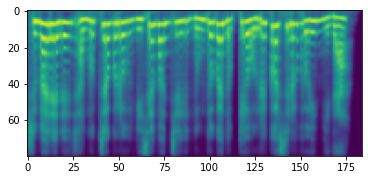

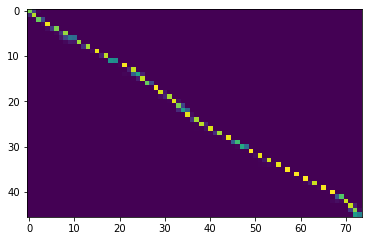

In [5]:
import inference
import hparams
import numpy as np
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import random
import dataset

while True:
    speaker = input("발화자의 이름을 입력하세요. 아무것도 입력하지 않으면 랜덤한 화자로 설정됩니다. ?를 입력하면 전체 발화자의 이름을 출력합니다.")
    
    if len(speaker) == 0:
        speaker = dataset.SPEAKERS[random.randrange(0, len(dataset.SPEAKERS))]
        break
    if speaker == "?":
        print(dataset.SPEAKERS)
        continue
    if speaker in dataset.SPEAKERS:
        break
    print("발화자", speaker, "는 존재하지 않습니다.")


while True:
    text = input("문장을 입력하세요. 한글과 영어 모두 지원됩니다. 단, 숫자는 직접 발음할 수 없으므로 한글이나 영어 발음으로 옮겨주세요.")
    
    if len(text) == 0:
        print("문장을 입력해주세요.")
        continue
    break

print("=" * 20)
print("발화자:", speaker)
print("문장:", text)
print("=" * 20)

dec_out, weights, linear = inference.inference(speaker, text)

linear = linear.T * (hparams.max_db - hparams.min_db) + hparams.min_db  # dB
linear = np.power(10, linear * 0.05)  # amplitude
wav = librosa.griffinlim(linear, hop_length=hparams.hop_length)
wav = librosa.util.normalize(wav)

plt.imshow(dec_out.T)
plt.show()
plt.imshow(weights)
plt.show()

ipd.Audio(wav, rate=hparams.sample_rate)

### 6. 결론
데이터를 가공하고 딥러닝 모델을 직접 구현하여 학습시켜보았다. 학습 시간이 길지 않았지만 모델이 빠르게 수렴하였고, 최종적으로 어느정도 모델이 안정적으로 발음을 생성해낸다는 것을 확인하였다. 음성 파일에 대한 다른 정보 없이 오직 문장만을 사용해 학습했는데, 이는 딥러닝 모델이 음성 파일에서 각 음소가 어떻게 어떤 시간에 발음되는지에 대한 규칙을 직접 찾은 것이라고 할 수 있다. 또한 한국어 발음과 영어 발음을 동시에 학습하는 것이 가능하다는 것을 보여주었다. 이는 굉장히 재미있는 결과로 이어지는데, 영어 원어민을 발화자로 설정하고 한국어 문장을 입력하면, 그 목소리 거의 그대로 한국어를 발음하는 것을 확인할 수 있다. 즉, 모델은 발화자의 목소리 특징과 문자의 발음 방법을 각각 따로 학습했다는 것이다.

그러나 몇가지 한계점들이 존재한다. 첫째로 음성이 또렷하지 않다는 것이다. 이는 mel spectrogram을 linear spectrogram으로 Upscaling하고, 이를 Graffin-Lim 알고리즘으로 처리하기 때문으로 생각된다. 따라서 이를 극복하기 위해서는 학습 모델의 파라미터를 늘리고, Graffin-Lim 대신에 WaveNet 등의 모델을 같이 학습시키는 방법이 있다. 둘째로 LSTM 대신 Convolution Layer와 Positional Encoding을 사용하여 학습 속도와 퀄리티를 높이는 연구들이 활발히 진행되고 있다. TTS 분야에서는 Deep voice 3 모델이 여기에 해당한다. 또한 현재 추세로 보았을 때, LSTM은 거의 사용되지 않는 추세이고, 자연어 처리 분야에서도 Transformer Architecture가 그 자리를 매꿔가고 있다. 이번 프로젝트에서도 LSTM을 사용하지 않고 1D Conv와 Positional Encoding만을 사용하여 학습을 해보았지만 LSTM이 더 빠르게 수렴하고 좋은 성능을 보였다. 다음은 LSTM을 사용하지 않은 모델의 456000 step에서의 추론 Alignment이다.

![](images/conv_456000-0.png)

아마도 더 많은 파라미터를 필요로 하는 것으로 보인다. 위 사진의 모델은 충분하지 못한 파라미터 개수, 좁은 Receptive Field, 그리고 Positional Encoding에 의존했기 때문에 Long Term Dependency를 잡기가 힘들었던 것으로 추측된다.


### 7. 사용한 오픈소스 프로젝트
- 텐서플로우 https://github.com/tensorflow/tensorflow
- librosa https://github.com/librosa/librosa
- matplotlib https://github.com/matplotlib/matplotlib
- jamo https://github.com/JDongian/python-jamo

### 8. 참고 문헌
- Tacotron: Towards End-to-End Speech Synthesis https://arxiv.org/abs/1703.10135
- Natural TTS Synthesis by Conditioning WaveNet on Mel Spectrogram Predictions https://arxiv.org/abs/1712.05884
- Deep Voice 3: Scaling Text-to-Speech with Convolutional Sequence Learning https://arxiv.org/abs/1710.07654
- 어텐션 메커니즘 (Attention Mechanism) https://wikidocs.net/22893

### 9. 데이터 원본 (링크)
각 데이터에 대한 상세한 설명은 3번을 참조.
특히 국립국어원에서 제공하는 데이터는 회원가입 후 다운로드 가능하다.
- https://ithub.korean.go.kr/user/corpus/referenceManager.do (서울말 낭독체 발화 말뭉치)
- http://www.openslr.org/40/
- https://www.kaggle.com/bryanpark/korean-single-speaker-speech-dataset
- http://www.openslr.org/12/
- https://keithito.com/LJ-Speech-Dataset/

### 10. 가공된 데이터
가공된 데이터의 크기가 너무 큰 관계로 총 512개의 파일 중, 가장 작은 크기의 파일 하나를 첨부하였다.
- dataset/data_0.tfrecord

### 11. 소스코드 원본
1. audio.py  
오디오 파형을 spectrogram으로 변환한다.
2. dataset.py  
데이터셋을 순회하면서 모든 데이터 쌍을 읽어온다.
3. inference.py  
학습된 모델을 직접 테스트 해볼 수 있다. checkpoint 폴더 안에 학습된 모델이 존재해야 한다.
4. hparams.py  
모델 정의에 필요한 하이퍼파라미터를 정의한다.
5. model.py  
Encoder와 Decoder로 구성된 모델을 구현한다.
6. plot.py  
학습 중에 생성된 Alignment와 Mel output을 이미지로 저장해준다.
7. prepare_data.py  
실제 학습을 위해 데이터를 가공하고 저장한다. 모든 데이터셋들이 지정된 폴더에 존재해야 한다.
8. train.py  
학습을 진행한다. prepare_data를 먼저 실행하여 학습 데이터를 준비해야 한다.
9. vocabulary.py  
문장을 토큰으로 변환하거나 역변환한다.